In [1]:
import sys
sys.path.append("..\\") # parent directory
from AQUA_general import AQUA
from batchAQUA_general import batchAQUA
from stimulus import *
from plotting_functions import *
from functions import *

import numpy as np
import matplotlib.pyplot as plt

"""
Try and see why the response is different to the ramp when an autapse is present.


"""

'\nTry and see why the response is different to the ramp when an autapse is present.\n\n\n'

In [2]:
RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
      'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.0, 'f': 0.0, 'tau': 0.0}           # Class 1

#RS_E = {'name': 'RS_E', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
#        'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.03, 'f': 10.0, 'tau': 2.0}       # Class 1

#RS_I = {'name': 'RS_I', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35, 
#       'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.03, 'f': -10.0, 'tau': 2.0}      # Class 1


In [3]:
def run_adaptation_ramps(neuron_params, e, f, tau, title):
    # simulation duration
    T = 2000
    dt = 0.01
    N_iter = int(T/dt)

    #initial conditions
    x_ini = np.array([-65, 0., 0.])
    t_ini = 0.0


    #excitatory autapse params
    excitatory_autapse = neuron_params.copy()
    excitatory_autapse['e'] = e
    excitatory_autapse['f'] = f
    excitatory_autapse['tau'] = tau

    # inhibitory autapse params
    inhibitory_autapse = neuron_params.copy()
    inhibitory_autapse['e'] = e
    inhibitory_autapse['f'] = -f
    inhibitory_autapse['tau'] = tau


    #neurons
    neuron = AQUA(neuron_params)
    neuron_E = AQUA(excitatory_autapse)
    neuron_I = AQUA(inhibitory_autapse)

    # ramp current
    I_range = [50, 200]
    I_inj = ramp(N_iter, dt, I_range[0], 500, I_range[1])

    #initialise neurons
    neuron.Initialise(x_ini, t_ini)
    neuron_E.Initialise(x_ini, t_ini)
    neuron_I.Initialise(x_ini, t_ini)

    # simulate trial
    X, T, spikes = neuron.update_RK2(dt, N_iter, I_inj)
    X_E, T_E, spikes_E = neuron_E.update_RK2(dt, N_iter, I_inj)
    X_I, T_I, spikes_I = neuron_I.update_RK2(dt, N_iter, I_inj)

    # plot adaptation variable alone

    fig, ax = plt.subplots(2, 1, figsize = (10, 5))
    split = np.arange(40000, 200000)

    ax[0].plot(T[split], -X[1, split], label = "no autapse")
    ax[0].plot(T[split], -X_E[1, split], label = "excitatory autapse")
    ax[0].plot(T[split], -X_I[1, split], label = "inhibitory autapse")

    ax[1].plot(T[split], X[0, split], label = "no autapse")
    ax[1].plot(T[split], X_E[0, split], label = "excitatory autapse")
    ax[1].plot(T[split], X_I[0, split], label = "inhibitory autapse")


    ax[0].set_xlabel("Time [ms]")
    ax[0].set_ylabel("u")
    ax[0].set_title(title)
    plt.legend()
    plt.show()

# same parameters as above, but will run things against steps instead
def run_adaptation_steps(neuron_params, e, f, tau, title):
    # simulation duration
    T = 2000
    dt = 0.01
    N_iter = int(T/dt)

    #initial conditions
    x_ini = np.array([-65, 0., 0.])
    t_ini = 0.0


    #excitatory autapse params
    excitatory_autapse = neuron_params.copy()
    excitatory_autapse['e'] = e
    excitatory_autapse['f'] = f
    excitatory_autapse['tau'] = tau

    # inhibitory autapse params
    inhibitory_autapse = neuron_params.copy()
    inhibitory_autapse['e'] = e
    inhibitory_autapse['f'] = -f
    inhibitory_autapse['tau'] = tau


    #neurons
    neuron = AQUA(neuron_params)
    neuron_E = AQUA(excitatory_autapse)
    neuron_I = AQUA(inhibitory_autapse)

    # ramp current
    I_h = 150
    I_inj = step_current(N_iter, dt, 0.0, 500, I_h)

    #initialise neurons
    neuron.Initialise(x_ini, t_ini)
    neuron_E.Initialise(x_ini, t_ini)
    neuron_I.Initialise(x_ini, t_ini)

    # simulate trial
    X, T, spikes = neuron.update_RK2(dt, N_iter, I_inj)
    X_E, T_E, spikes_E = neuron_E.update_RK2(dt, N_iter, I_inj)
    X_I, T_I, spikes_I = neuron_I.update_RK2(dt, N_iter, I_inj)

    # plot adaptation variable alone

    fig, ax = plt.subplots(2, 1, figsize = (10, 5))
    split = np.arange(40000, 200000)

    ax[0].plot(T[split], -X[1, split], label = "no autapse")
    ax[0].plot(T[split], -X_E[1, split], label = "excitatory autapse")
    ax[0].plot(T[split], -X_I[1, split], label = "inhibitory autapse")

    ax[1].plot(T[split], X[0, split], label = "no autapse")
    ax[1].plot(T[split], X_E[0, split], label = "excitatory autapse")
    ax[1].plot(T[split], X_I[0, split], label = "inhibitory autapse")


    ax[0].set_xlabel("Time [ms]")
    ax[0].set_ylabel("u")
    ax[0].set_title(title)
    plt.legend()
    plt.show()

#### CHANGING THE INTRINSIC ADAPTATION TIME OF THE NEURON

If the neuron adapts too quickly then the effect of the autapse is washed out.

100%|██████████| 199999/199999 [00:02<00:00, 68012.14it/s]


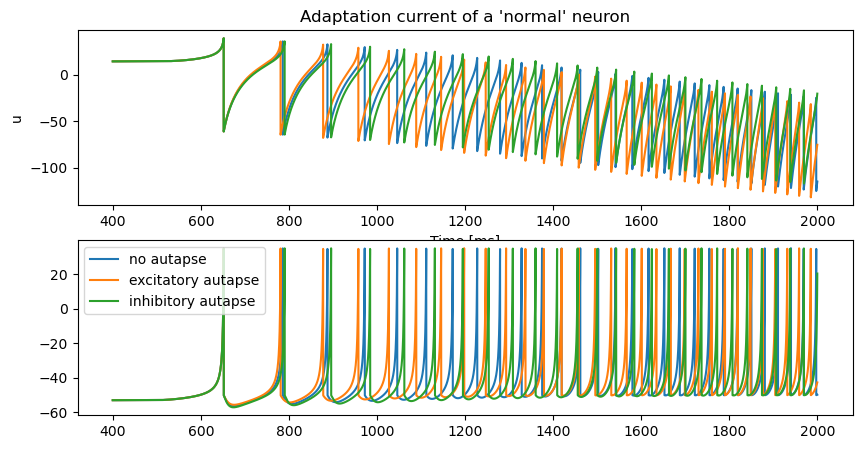

In [4]:
"""NORMAL NEURON"""

RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
      'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.0, 'f': 0.0, 'tau': 0.0}           # Class 1
e = 0.03
f = 10
tau = 0.5
run_adaptation_ramps(RS, e, f, tau, "Adaptation current of a \'normal\' neuron")

100%|██████████| 199999/199999 [00:03<00:00, 66582.72it/s]


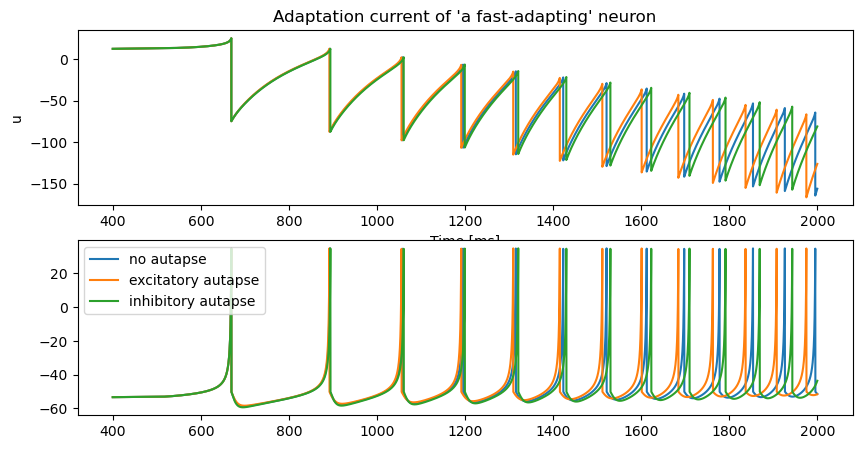

In [5]:
"""FAST ADAPTATION"""
RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
      'a': 0.01, 'b': -2, 'c': -50, 'd': 100, 'e': 0.0, 'f': 0.0, 'tau': 0.0}           # Class 1

run_adaptation_ramps(RS, e, f, tau, "Adaptation current of \'a fast-adapting\' neuron")

100%|██████████| 199999/199999 [00:03<00:00, 65792.94it/s]


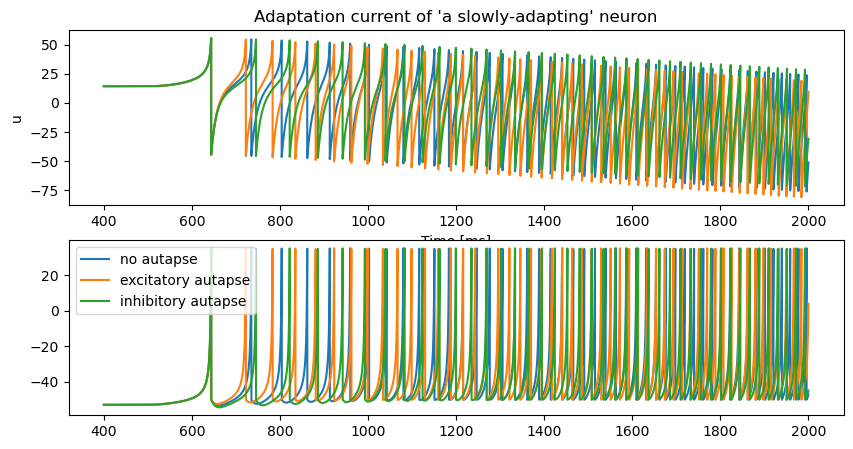

In [6]:
"""SLOW ADAPTATION"""

RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
      'a': 0.07, 'b': -2, 'c': -50, 'd': 100, 'e': 0.0, 'f': 0.0, 'tau': 0.0}           # Class 1

run_adaptation_ramps(RS, e, f, tau, "Adaptation current of \'a slowly-adapting\' neuron")

#### CHANGING THE DECAY CONSTANT OF THE AUTAPTIC CURRENT

Has a big influence, slower decay (larger effective injected current) causes a larger shift.

100%|██████████| 199999/199999 [00:03<00:00, 64508.82it/s]


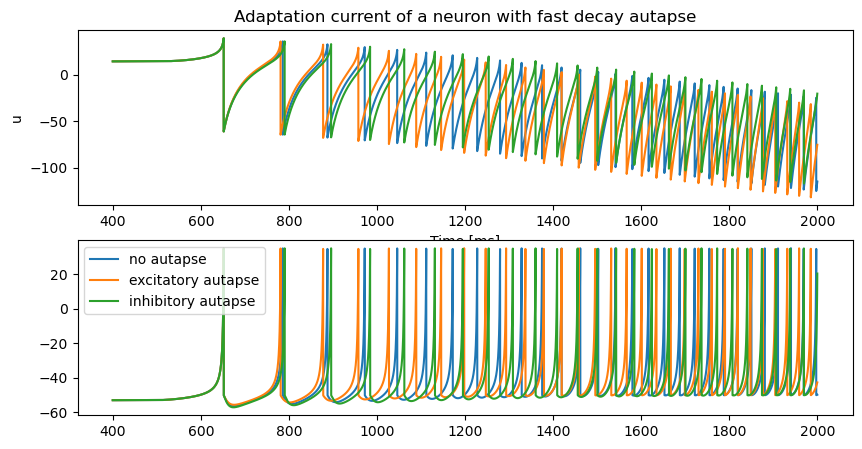

In [7]:
""" NORMAL NEURON"""
RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
      'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.0, 'f': 0.0, 'tau': 0.0}           # Class 1

e = 0.03 
f = 10
tau = 0.5

run_adaptation_ramps(RS, e, f, tau, "Adaptation current of a neuron with fast decay autapse")

100%|██████████| 199999/199999 [00:03<00:00, 64849.84it/s]


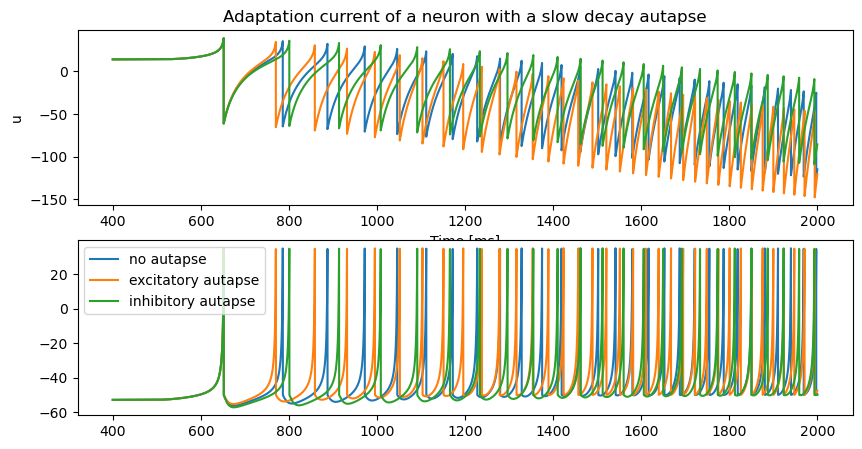

In [8]:
"""SLOW DECAY AUTAPSE"""

e = 0.01 # compared to 0.03 before
f = 10
tau = 0.5

run_adaptation_ramps(RS, e, f, tau, "Adaptation current of a neuron with a slow decay autapse")

100%|██████████| 199999/199999 [00:03<00:00, 65964.09it/s]


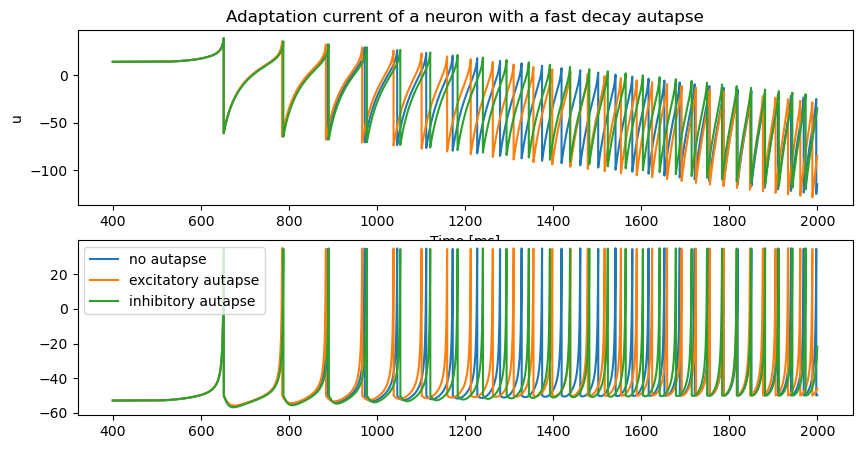

In [9]:
"""FAST DECAY AUTAPSE"""
e = 0.06 # compared to 0.03 before
f = 10
tau = 0.5

run_adaptation_ramps(RS, e, f, tau, "Adaptation current of a neuron with a fast decay autapse")

#### CHANGING THE AUTAPTIC TIME DELAY 

Doesn't make a huge difference. There likely is some difference owing to the intrinsic current not catching up so much, but this is minor.

100%|██████████| 199999/199999 [00:03<00:00, 63858.68it/s]


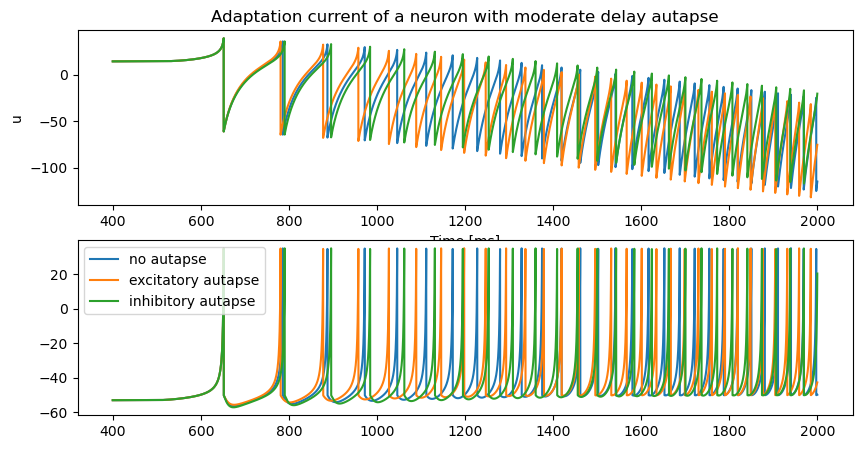

In [10]:
"""ORIGINAL DELAY - 0.5ms"""
RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
      'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.0, 'f': 0.0, 'tau': 0.0}           # Class 1

e = 0.03 
f = 10
tau = 0.5

run_adaptation_ramps(RS, e, f, tau, "Adaptation current of a neuron with moderate delay autapse")

100%|██████████| 199999/199999 [00:03<00:00, 66096.42it/s]


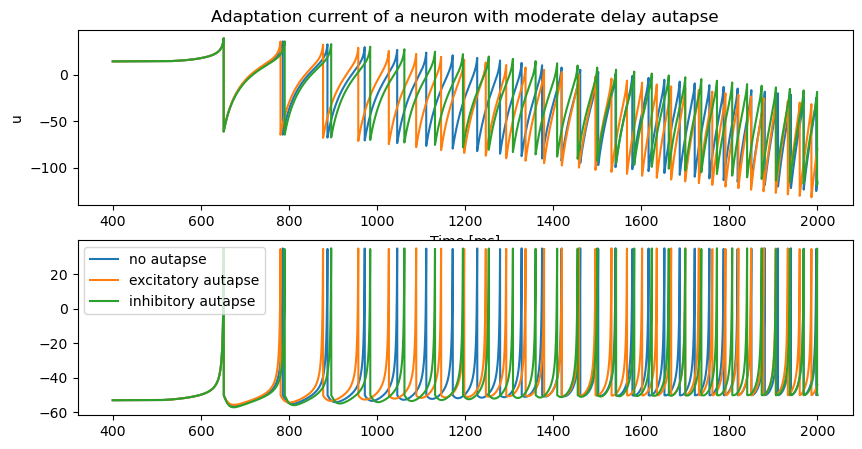

In [11]:
"""MODERATE DELAY - 2ms"""

e = 0.03 
f = 10
tau = 2

run_adaptation_ramps(RS, e, f, tau, "Adaptation current of a neuron with moderate delay autapse")

100%|██████████| 199999/199999 [00:03<00:00, 65776.38it/s]


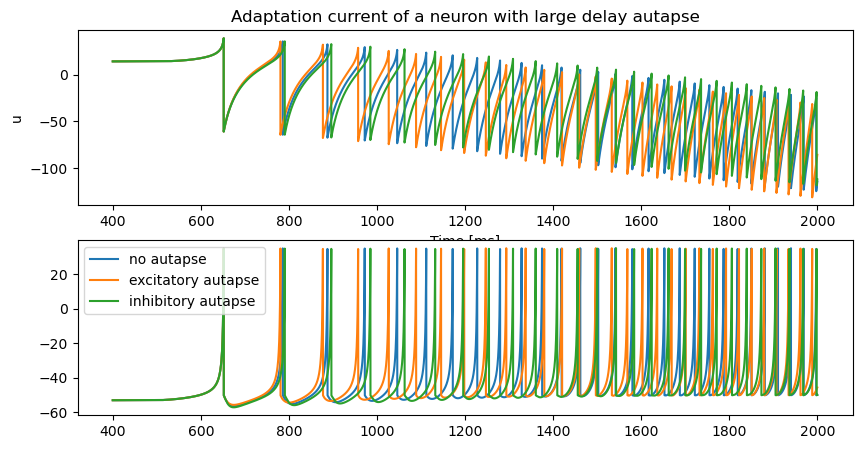

In [12]:
"""LARGER DELAY - 4ms"""
RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
      'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.0, 'f': 0.0, 'tau': 0.0}           # Class 1

e = 0.03 
f = 10
tau = 4

run_adaptation_ramps(RS, e, f, tau, "Adaptation current of a neuron with large delay autapse")

#### CHANGING THE PEAK AUTAPTIC CURRENT

produces an effect but this is relatively small

100%|██████████| 199999/199999 [00:03<00:00, 65531.62it/s]


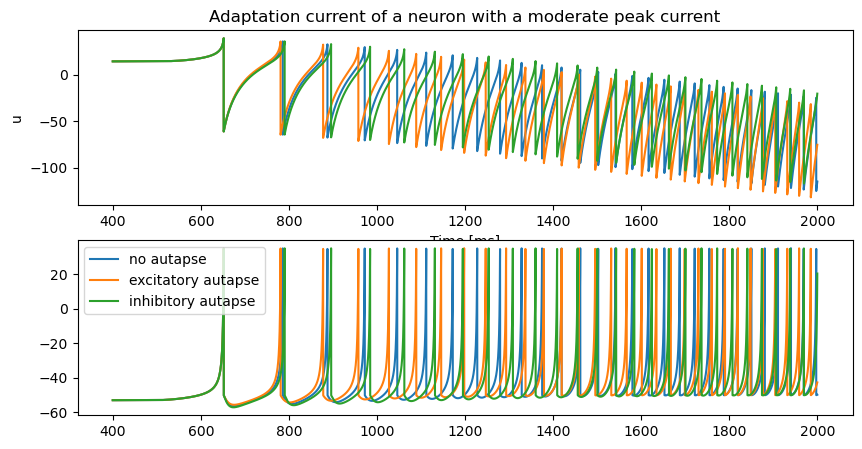

In [13]:
"""ORIGINAL NEURON - f = 10"""
RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
      'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.0, 'f': 0.0, 'tau': 0.0}           # Class 1

e = 0.03 
f = 10
tau = 0.5

run_adaptation_ramps(RS, e, f, tau, "Adaptation current of a neuron with a moderate peak current")

100%|██████████| 199999/199999 [00:03<00:00, 65624.54it/s]


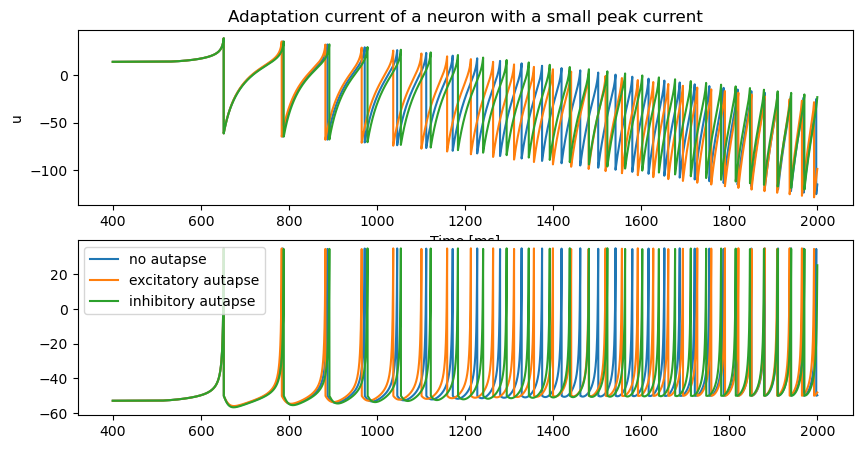

In [14]:
"""SMALL AUTAPSE - f = 5"""

e = 0.03 
f = 5
tau = 0.5

run_adaptation_ramps(RS, e, f, tau, "Adaptation current of a neuron with a small peak current")

100%|██████████| 199999/199999 [00:03<00:00, 63567.40it/s]


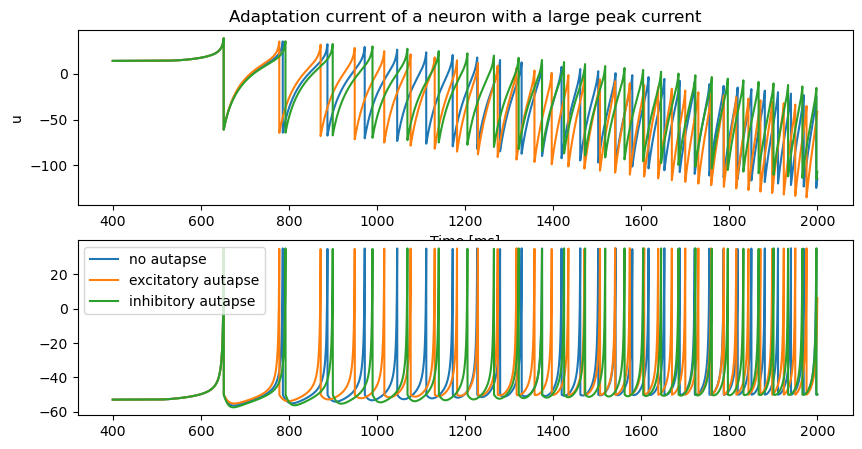

In [15]:
"""LARGE AUTAPSE - f = 15"""

e = 0.03 
f = 15
tau = 0.5

run_adaptation_ramps(RS, e, f, tau, "Adaptation current of a neuron with a large peak current")

* Can the effects be summarised with some other measures of the 'effective time delay' or the 'effective autaptic current'?

* The intrinsic adaptation time might have to be its own measure regardless.

#### Compare ramp current to step current

100%|██████████| 199999/199999 [00:03<00:00, 65896.48it/s]


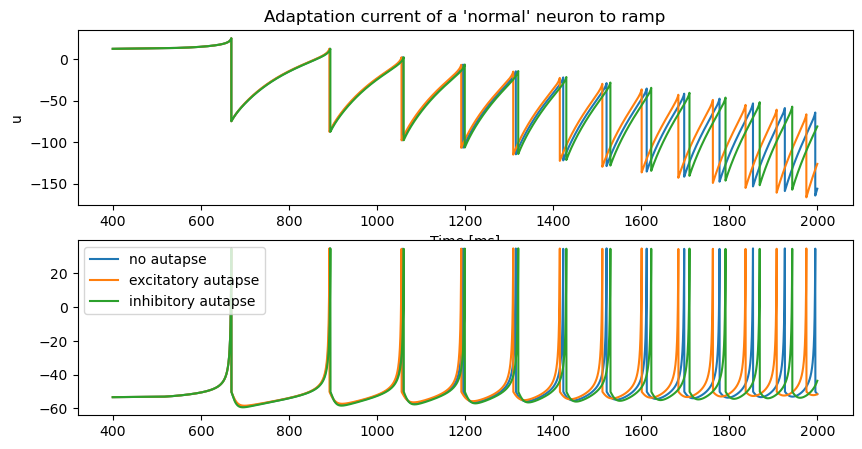

100%|██████████| 199999/199999 [00:03<00:00, 64463.08it/s]


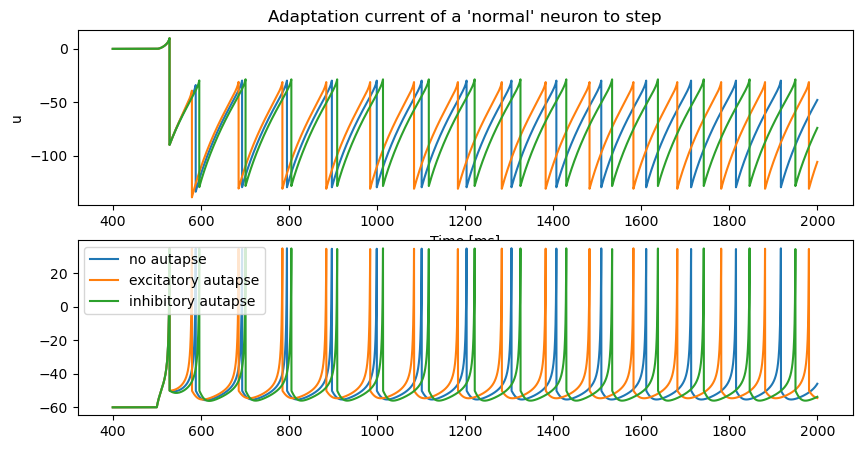

In [16]:
"""NORMAL NEURON"""

RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
      'a': 0.01, 'b': -2, 'c': -50, 'd': 100, 'e': 0.0, 'f': 0.0, 'tau': 0.0}           # Class 1
e = 0.03
f = 10
tau = 0.5
run_adaptation_ramps(RS, e, f, tau, "Adaptation current of a \'normal\' neuron to ramp")

run_adaptation_steps(RS, e, f, tau,"Adaptation current of a \'normal\' neuron to step")

#### Test the neuron's response to different slopes of the ramp current.

try different slopes by changing the delay time of the onset.

In [ ]:
# Generates the neuron's response do different slopes of ramp current.

def run_ramp_slopes(neuron_params, e, f, tau):
    # simulation duration
    T_s = 2000
    dt = 0.01
    N_iter = int(T_s/dt)  # 200,000

    #initial conditions
    x_ini = np.array([-65, 0., 0.])
    t_ini = 0.0


    #excitatory autapse params
    excitatory_autapse = neuron_params.copy()
    excitatory_autapse['e'] = e
    excitatory_autapse['f'] = f
    excitatory_autapse['tau'] = tau


    #neurons
    neuron = AQUA(neuron_params)
    neuron_E = AQUA(excitatory_autapse)


    # ramp current
    delay_range = range(500, 1050, 10)
    I_range = [50, 200]
    slopes = np.zeros(len(delay_range)) # to store the slope

    first_spike = np.zeros(len(delay_range)) # to store the difference between the 1st spike.
    second_spike = np.zeros(len(delay_range))
    tenth_spike = np.zeros(len(delay_range)) # to store difference to 2nd spike.

    freq_ini = np.zeros(len(delay_range)) # initial firing frequency of the non-autaptic neuron.

    # loop over different slopes of the ramp. Compare the difference to the corresponding 
    # spikes of + and non-autaptic neurons.
    for i, delay in enumerate(delay_range): # 1 ms jumps
        slopes[i] = np.round((I_range[1] - I_range[0])/(T_s - delay), 5) # the slope in units of pA/ms.
        I_inj = ramp(N_iter, dt, I_range[0], delay, I_range[1])


        #initialise neurons
        neuron.Initialise(x_ini, t_ini)
        neuron_E.Initialise(x_ini, t_ini)

        # simulate trial
        X, T, spikes = neuron.update_RK2(dt, N_iter, I_inj)
        X_E, T_E, spikes_E = neuron_E.update_RK2(dt, N_iter, I_inj)

        first_spike[i] = spikes[0] - spikes_E[0]
        second_spike[i] = spikes[1] - spikes_E[1]

        freq_ini[i] = 1000/(spikes[1] - spikes[0]) # Hz
        
        if len(spikes) >= 10:
            tenth_spike[i] = spikes[9] - spikes_E[9]
        else:
            tenth_spike[i] = np.nan

        if i == 0: # plot the usual plot for the first try
            fig, ax = plt.subplots(2, 1, figsize = (10, 5))
            split = np.arange(90*delay, 200000)

            ax[0].plot(T[split], -X[1, split], label = "no autapse")
            ax[0].plot(T[split], -X_E[1, split], label = "excitatory autapse")

            ax[1].plot(T[split], I_inj[split], c = 'r', label = "injected current")
            ax[1].set_title("Injected Current")

            ax[0].set_xlabel("Time [ms]")
            ax[0].set_ylabel("u")
            ax[0].set_title(f"Ramp with slope {slopes[i]} [pA/ms]")
            ax[0].legend()
            plt.legend()
            plt.show()

        if i == 10: # plot the usual plot for the first try
            fig, ax = plt.subplots(2, 1, figsize = (10, 5))
            split = np.arange(90*delay, 200000)

            ax[0].plot(T[split], -X[1, split], label = "no autapse")
            ax[0].plot(T[split], -X_E[1, split], label = "excitatory autapse")

            ax[1].plot(T[split], I_inj[split], c = 'r', label = "injected current")

            ax[0].set_xlabel("Time [ms]")
            ax[0].set_ylabel("u")
            ax[0].set_title(f"Ramp with slope {slopes[i]} [pA/ms]")
            plt.legend()
            plt.show()

    print(slopes)
    print(first_spike)

    """
    fig, ax = plt.subplots(2, 1, figsize = (8, 8))
    #split = np.arange(40000, 200000)
    ax[0].scatter(slopes, freq_ini, label = "second spike")

    ax[0].set_xlabel("Slope of the ramp [pA/ms]")
    ax[0].set_ylabel("Initial spike frequency of the non-autaptic neuron [ms]")
    ax[0].set_title("Difference between spike times for autaptic and non-autaptic neuron")

    ax[1].scatter(freq_ini, second_spike)
    ax[1].set_title("Difference of spike times versus non-autaptic firing frequency")
    ax[1].set_xlabel("Initial Firing Frequency [Hz]")
    ax[1].set_ylabel("Difference in spike times of the 2nd spike")

    plt.legend()
    plt.show()
    """
    return slopes, first_spike, second_spike, tenth_spike, freq_ini

def plot_jitter_slope(slopes, first, second, tenth):
    # plot the 'spike jitter' versus ramp slope.
    fig, ax = plt.subplots(1, 1, figsize = (8, 8))
    #split = np.arange(40000, 200000)

    #ax.scatter(slopes, first, label = "first spike")
    #ax.scatter(slopes, second, label = "second spike")
    ax.scatter(slopes, tenth, label = "tenth spike")

    ax.set_xlabel("Slope of the ramp [pA/ms]")
    ax.set_ylabel("Spike time difference (non-autaptic - autaptic) [ms]")
    ax.set_title("Difference between spike times for autaptic and non-autaptic neuron")
    plt.legend()
    plt.show()



100%|██████████| 199999/199999 [00:04<00:00, 49166.95it/s]


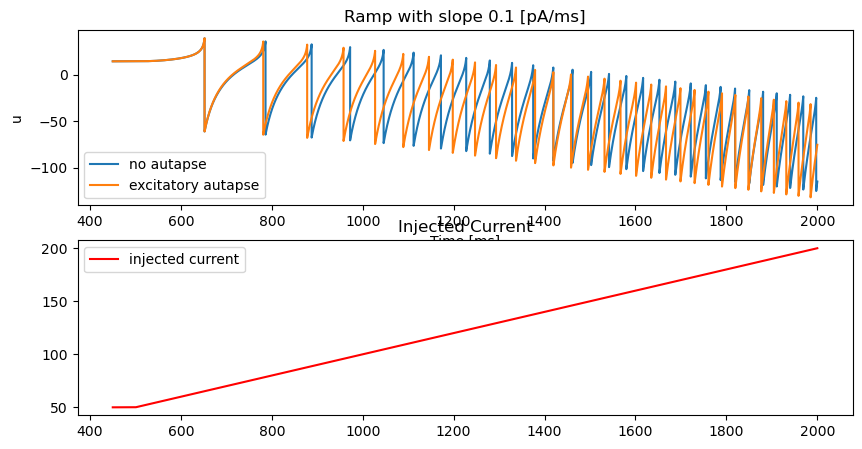

100%|██████████| 199999/199999 [00:03<00:00, 64856.26it/s]


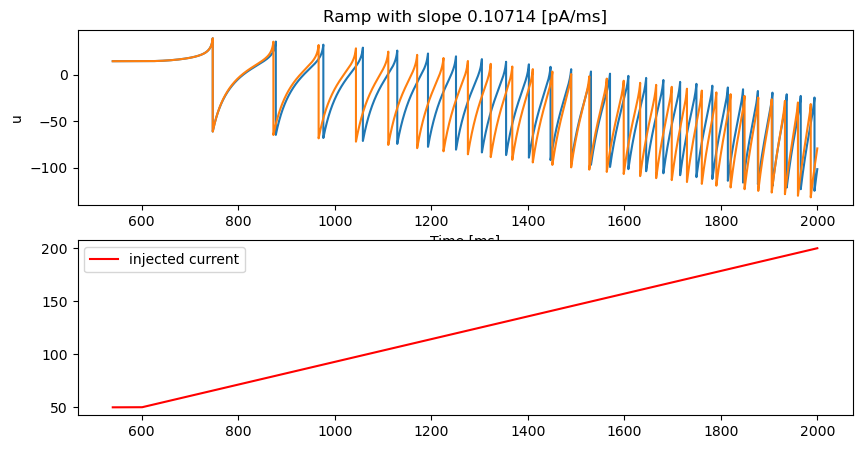

100%|██████████| 199999/199999 [00:03<00:00, 63579.20it/s]


[0.1     0.10067 0.10135 0.10204 0.10274 0.10345 0.10417 0.1049  0.10563
 0.10638 0.10714 0.10791 0.1087  0.10949 0.11029 0.11111 0.11194 0.11278
 0.11364 0.1145  0.11538 0.11628 0.11719 0.11811 0.11905 0.12    0.12097
 0.12195 0.12295 0.12397 0.125   0.12605 0.12712 0.12821 0.12931 0.13043
 0.13158 0.13274 0.13393 0.13514 0.13636 0.13761 0.13889 0.14019 0.14151
 0.14286 0.14423 0.14563 0.14706 0.14851 0.15    0.15152 0.15306 0.15464
 0.15625]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


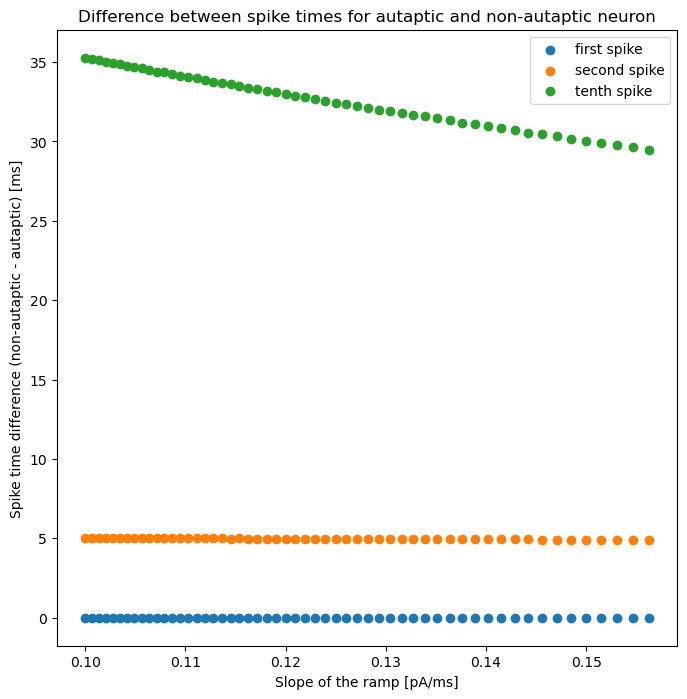

In [ ]:
RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
      'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.0, 'f': 0.0, 'tau': 0.0}           # Class 1
e = 0.03
f = 10
tau = 0.5

slopes, first, second, tenth, freq = run_ramp_slopes(RS, e, f, tau)


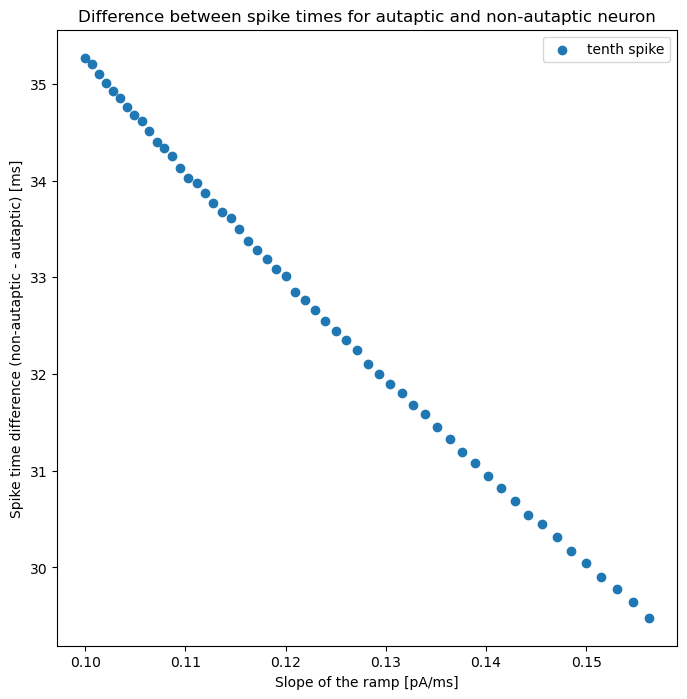

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


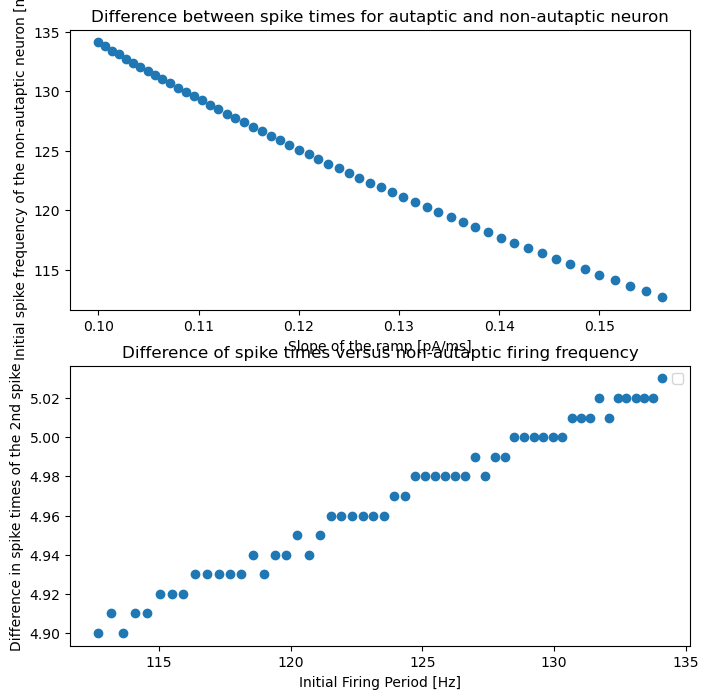

In [35]:
plot_jitter_slope(slopes, first, second, tenth)

fig, ax = plt.subplots(2, 1, figsize = (8, 8))

ax[0].scatter(slopes, 1000/freq, label = "second spike")

ax[0].set_xlabel("Slope of the ramp [pA/ms]")
ax[0].set_ylabel("Initial spike frequency of the non-autaptic neuron [ms]")
ax[0].set_title("Difference between spike times for autaptic and non-autaptic neuron")

ax[1].scatter(1000/freq, second)
ax[1].set_title("Difference of spike times versus non-autaptic firing frequency")
ax[1].set_xlabel("Initial Firing Period [Hz]")
ax[1].set_ylabel("Difference in spike times of the 2nd spike")

plt.legend()
plt.show()

The response of the neuron is identical for the first spike because the autapse hasn't had an effect yet. 

The increasing slope of the ramp will decrease the difference between the autaptic and non-autaptic neuron. This is presumably because of the increasing firing frequency giving less time for the autapse to create a large influence.

Firing frequency between the first 2 spikes seems to increase linearly with the increasing ramp.

The difference in the 2nd spike time is decreasing roughly linearly with the slope. It looks like its decreasing in steps, this is probably because of rounding errors and the time resolution only going to 1/100 ms.

The tenth spike difference seems to be decreasing linearly with with the increasing slope/frequency. Does this suggest that the trend in the spike deviations can be explained by the decreasing integration time? 

#### How to compare to the step current results?
Intuitively this would be interpreted the same way. The peak adaptation just doesn't change with time, I guess. The changing injected current maybe induces the adaptation to change ever so slightly more quickly, so the effect of the autapse is slightly amplified. 